In [33]:
import torch
from torch.utils.data import Dataset # 주로 데이터를 로드.
from torchvision import datasets # 예제 데이터가 담겨 있음.
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

train_data = datasets.FashionMNIST(
    root = "data", # 데이터 저장 경로.
    train=True,
    download=True, # root에 데이터가 없는 경우 인터넷에서 다운로드.
    transform=ToTensor() # 데이터에 대한 변형 지원
)

test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform=ToTensor()
)

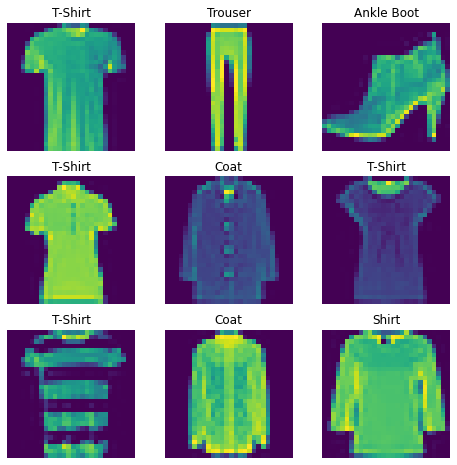

In [34]:
# 이미지 데이터를 시각화
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1) :
    sample_idx = torch.randint(len(train_data), size=(1, )).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

In [36]:
# dataset 만들어봄.

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset): # Dataset을 상속

    # 객체가 생성될때 한번만 실행됨.
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_cvs(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path_join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image":image, "label":label}
        return sample

In [65]:
from torch.utils.data import DataLoader # 학습하기 편한 형식의 데이터로 담기 위한 객체.

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True) # batch_size 만큼의 묶음을 반환.
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
print(train_data)
print(train_dataloader)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [66]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Features batch shape : {train_features.size()}")
print(f"Labels batch shape : {train_labels.size()}")
print(train_dataloader)

Features batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])
